## Abstract

The airline industry is a very competitive market which has grown rapidly in the past 2 decades. Airline companies resort to traditional customer feedback forms which in turn are very tedious and time consuming. This is where Twitter data serves as a good source to gather customer feedback tweets and perform a sentiment analysis

### Problem statement

Here i will be looking at US Airlines twitter data to  predict the accuracy of how customer tweet relates to a class sentiment(negative, positive, neutral). This is a classic case of a sentiment analysis in machine learning. 

In [1]:
import pandas as pd
import numpy as np
import nltk
import string
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
import re
import os
from nltk.tokenize import WordPunctTokenizer
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from textblob import TextBlob

#from sklearn.cross_validation import train_test_split
from textblob.classifiers import NaiveBayesClassifier
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Style
sns.set(font_scale=1.5)
plt.style.use('seaborn-pastel')
plt.style.use('seaborn-poster')

In [2]:
df = pd.read_csv('tweets.csv')

In [3]:
df.head(13)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
5,570300767074181121,negative,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a fligh...,NaN,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada)
6,570300616901320704,positive,0.6745,NaN,0.0000,Virgin America,NaN,cjmcginnis,NaN,0,"@VirginAmerica yes, nearly every time I fly VX...",NaN,2015-02-24 11:13:57 -0800,San Francisco CA,Pacific Time (US & Canada)
7,570300248553349120,neutral,0.6340,NaN,NaN,Virgin America,NaN,pilot,NaN,0,@VirginAmerica Really missed a prime opportuni...,NaN,2015-02-24 11:12:29 -0800,Los Angeles,Pacific Time (US & Canada)
8,570299953286942721,positive,0.6559,NaN,NaN,Virgin America,NaN,dhepburn,NaN,0,"@virginamerica Well, I didn't…but NOW I DO! :-D",NaN,2015-02-24 11:11:19 -0800,San Diego,Pacific Time (US & Canada)
9,570295459631263746,positive,1.0000,NaN,NaN,Virgin America,NaN,YupitsTate,NaN,0,"@VirginAmerica it was amazing, and arrived an ...",NaN,2015-02-24 10:53:27 -0800,Los Angeles,Eastern Time (US & Canada)


## Explore Data 

## Counting tweets for each sentiment class

From the results below we can see that the most shared sentiments based on US Airlines are negative sentiments.

In [4]:
df1 = df['airline_sentiment'].value_counts()
df1

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

## Overall sentiments for US airline

Graphically we can also confirm that the most shared sentiments for US Airlines are negative sentiments

Text(0.5, 0, 'sentiment class')

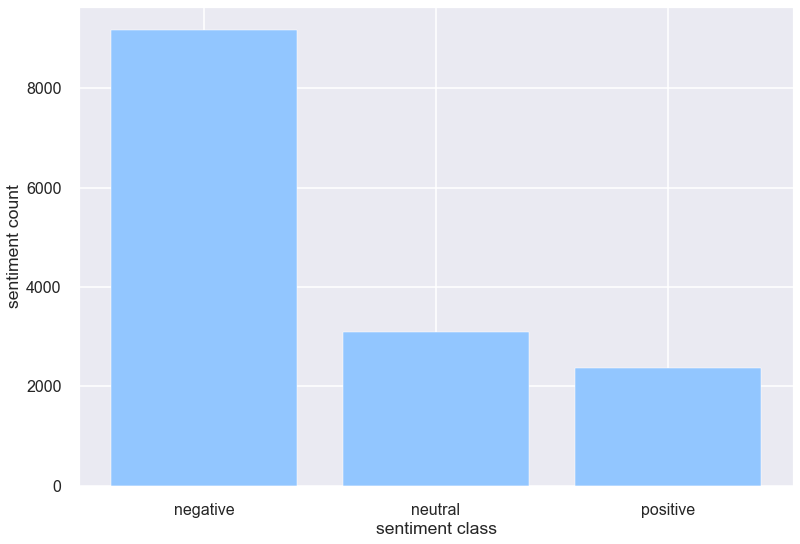

In [5]:
Index = [1,2,3]
plt.bar(Index, df1)
plt.xticks(Index, ['negative','neutral','positive'])
plt.ylabel('sentiment count')
plt.xlabel('sentiment class')

 As we can see from the above graph the sentiments which are most shared about US airlines are largely negative. This could be due to a factor of reasons.

## Most Sentiments shared for each airline

In [6]:
pd.crosstab(df.airline, df.airline_sentiment)

airline_sentiment,negative,neutral,positive
airline,,,
American,1960,463,336
Delta,955,723,544
Southwest,1186,664,570
US Airways,2263,381,269
United,2633,697,492
Virgin America,181,171,152


<ipython-input-7-57aa70264026>:6: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  ax1.pie(sizes, colors=colors, labels=labels, autopct='%1.1f%%', startangle=90)


Text(0.5, 1.0, 'Tweets Frequency by Airline')

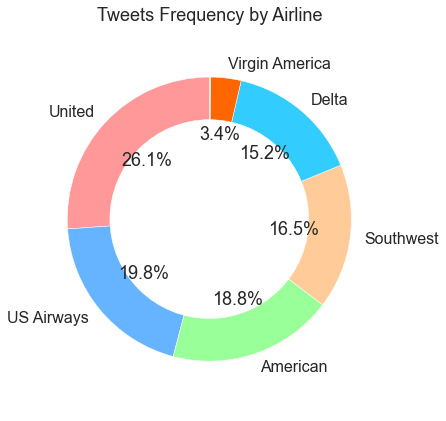

In [7]:

#Pie chart of tweets frequency for each airline
labels = ['United','US Airways','American','Southwest','Delta','Virgin America']
sizes = [0.261, 0.198, 0.188, 0.165, 0.152, 0.0344]
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99', '#33ccff', '#ff6600']
fig1, ax1 = plt.subplots(figsize=(6.5, 6))
ax1.pie(sizes, colors=colors, labels=labels, autopct='%1.1f%%', startangle=90)

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax1.axis('equal')  
plt.tight_layout()
plt.title('Tweets Frequency by Airline', fontsize=18)

### Observation 
United Airlines has the most negative sentiments but if you look at how frequently people tweet about the airline , it becomes evident that a possible reason why the United airline has so much negative feedback could be because it is the most frequently used airline in the United States(possibly due to affordability). We can further assume that because the airline is so affordable, not a lot services are offered ,as it will later be seen from a visual representing the reason for the negative sentiments. 

## Reason for people sharing negative sentiments for each airline

Text(0.5, 1.0, 'Distribution of Number of negative tweets for every Airline')

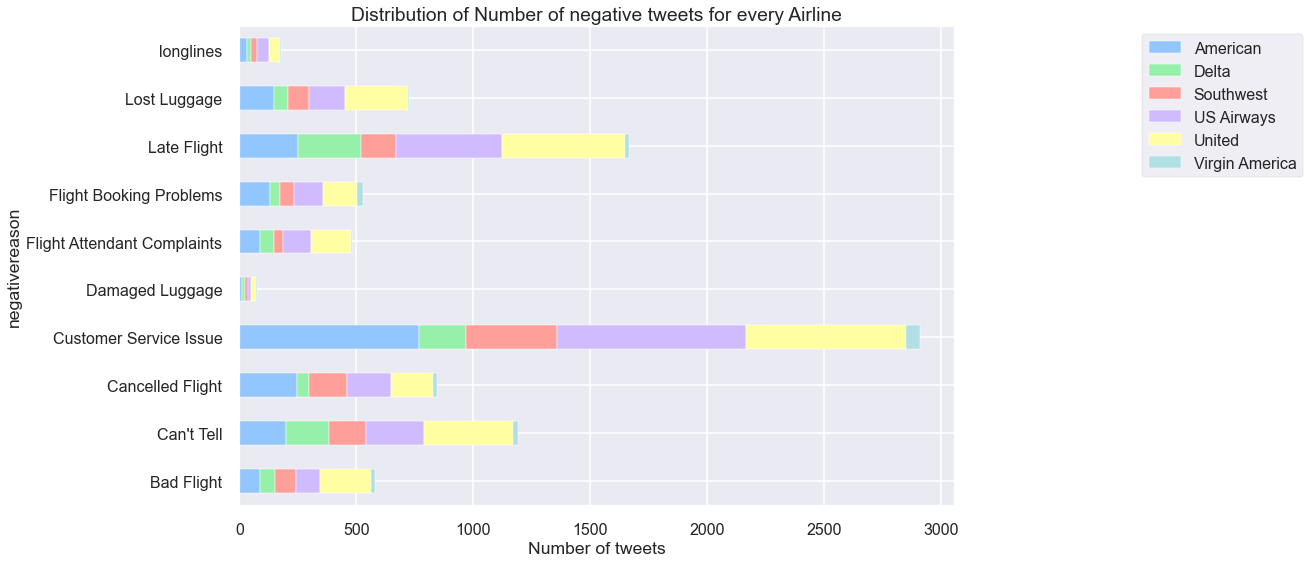

In [8]:
types = df.groupby("negativereason")['airline'].value_counts(normalize=False).sort_index()
types.unstack().plot(kind='barh', stacked='True')
plt.legend(bbox_to_anchor=(1.5, 1), loc='upper right')
plt.xlabel('Number of tweets')
plt.title('Distribution of Number of negative tweets for every Airline')

### Observation 

As previously seen the United Airline shares the most negative sentiments. One conclusion that i made was that it an affordable airline and due to the fact , it doesn't offer a lot of customer friendly services. If we look at the above graph we can see that United airlines accounts for a lot of the negative reasons shared concerning an airline and their biggest issue big that of customer service issues. This agrees with my initial generalisation , which suggested that the flight is the most frequently used with a possible reason being its good affordability and becuase of that fact , not a lot of customer friendly services are offered. These customer Service issues include waiting for a long period of time on the phone to speak to a consulted, not getting a response in time if you send an email about an issue, the customer support allocating tickets to the wrong department.  

## Top 5 negative reasons 

In [9]:
df.negativereason.value_counts().sort_values(ascending=False).head(5)

Customer Service Issue    2910
Late Flight               1665
Can't Tell                1190
Cancelled Flight           847
Lost Luggage               724
Name: negativereason, dtype: int64

## Preprocessing Data 

In this code block , i wrote a script to clean the data. This will make it easier for my models to generalize the data better or improve the performance of the model. 

Looking at my dataset what needs to be cleaned is the text feature(which is basically the comments relating to the sentiment shared by the customers on twitter), as it has a lot of stop words and unnecessary punctuation. 

In [10]:
username = '@[A-Za-z0-9]+'
url = 'https?://[^ ]+'
link = 'www.[^ ]+'
combined_p = '|'.join((username, url, link))
neg_dic = {"isn't":"is not", "aren't":"are not", "wasn't":"was not", "weren't":"were not",
                "haven't":"have not","hasn't":"has not","hadn't":"had not","won't":"will not",
                "wouldn't":"would not", "don't":"do not", "doesn't":"does not","didn't":"did not",
                "can't":"can not","couldn't":"could not","shouldn't":"should not","mightn't":"might not",
                "mustn't":"must not"}
neg = re.compile('\b(' + '|'.join(neg_dic.keys()) + ')\b')
tok = WordPunctTokenizer()

def tweet_cleaner(text):
    stripped = re.sub(combined_p, '', text)
    lower_case = stripped.lower()
    neg_handled = neg.sub(lambda x: neg_dic[x.group()], lower_case)
    letters = re.sub("[^a-zA-Z]", " ", neg_handled)
    words = [x for x in tok.tokenize(letters) if len(x) > 1]
    drop_stopwords = [x for x in words if x not in stopwords.words('english')]
    return (" ".join(drop_stopwords)).strip()

In [11]:
clean_tweets = []
for tweet in df.text:
    clean_tweets.append(tweet_cleaner(tweet))
df['clean_text'] = pd.DataFrame(clean_tweets)

In [12]:
df

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,clean_text
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),said
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),plus added commercials experience tacky
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),today must mean need take another trip
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),really aggressive blast obnoxious entertainmen...
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),really big bad thing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN,thank got different flight chicago
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN,leaving minutes late flight warnings communica...
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN,please bring american airlines blackberry
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada),money change flight answer phones suggestions ...


In [13]:
list(df)

['tweet_id',
 'airline_sentiment',
 'airline_sentiment_confidence',
 'negativereason',
 'negativereason_confidence',
 'airline',
 'airline_sentiment_gold',
 'name',
 'negativereason_gold',
 'retweet_count',
 'text',
 'tweet_coord',
 'tweet_created',
 'tweet_location',
 'user_timezone',
 'clean_text']

In [14]:
df = df.drop(['text'], axis =1)

In [15]:
df

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,tweet_coord,tweet_created,tweet_location,user_timezone,clean_text
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),said
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),plus added commercials experience tacky
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),today must mean need take another trip
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),really aggressive blast obnoxious entertainmen...
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),really big bad thing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,NaN,2015-02-22 12:01:01 -0800,NaN,NaN,thank got different flight chicago
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,NaN,2015-02-22 11:59:46 -0800,Texas,NaN,leaving minutes late flight warnings communica...
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN,please bring american airlines blackberry
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada),money change flight answer phones suggestions ...


## Analysing the amount of missing values


A data set with a lot of missing values makes it hard for the model to create a general observation about the data. So the way i dealt with this issue , was by finding out the percentage of the missing values in each column and drop the columns with the highest missing values because they are considered redunant columns. For columns with few missing values , i used Imputation. 

In [16]:
df.shape

(14640, 15)

## Percentage of missing values 

In [17]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'percent_missing': percent_missing})
                                 

In [18]:
missing_value_df

,percent_missing
tweet_id,0.000000
airline_sentiment,0.000000
airline_sentiment_confidence,0.000000
negativereason,37.308743
negativereason_confidence,28.128415
airline,0.000000
airline_sentiment_gold,99.726776
name,0.000000
negativereason_gold,99.781421
retweet_count,0.000000


In [19]:
df = df.drop(['airline_sentiment_gold','negativereason_gold','tweet_coord'],axis =1 )

In [20]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,tweet_created,tweet_location,user_timezone,clean_text
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,cairdin,0,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),said
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,jnardino,0,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),plus added commercials experience tacky
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,yvonnalynn,0,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),today must mean need take another trip
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),really aggressive blast obnoxious entertainmen...
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),really big bad thing


In [21]:
df['negativereason_confidence'].fillna(df['negativereason_confidence'].mean(), inplace=True)

In [22]:
from numpy import nan
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=nan, strategy='most_frequent')
df.negativereason = imputer.fit_transform(df['negativereason'].values.reshape(-1,1))[:,0]
df.tweet_location = imputer.fit_transform(df['tweet_location'].values.reshape(-1,1))[:,0]
df.user_timezone  = imputer.fit_transform(df['user_timezone'].values.reshape(-1,1))[:,0]

In [23]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'percent_missing': percent_missing})
missing_value_df

,percent_missing
tweet_id,0.0
airline_sentiment,0.0
airline_sentiment_confidence,0.0
negativereason,0.0
negativereason_confidence,0.0
airline,0.0
name,0.0
retweet_count,0.0
tweet_created,0.0
tweet_location,0.0


In [24]:
df

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,tweet_created,tweet_location,user_timezone,clean_text
0,570306133677760513,neutral,1.0000,Customer Service Issue,0.638298,Virgin America,cairdin,0,2015-02-24 11:35:52 -0800,"Boston, MA",Eastern Time (US & Canada),said
1,570301130888122368,positive,0.3486,Customer Service Issue,0.000000,Virgin America,jnardino,0,2015-02-24 11:15:59 -0800,"Boston, MA",Pacific Time (US & Canada),plus added commercials experience tacky
2,570301083672813571,neutral,0.6837,Customer Service Issue,0.638298,Virgin America,yvonnalynn,0,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),today must mean need take another trip
3,570301031407624196,negative,1.0000,Bad Flight,0.703300,Virgin America,jnardino,0,2015-02-24 11:15:36 -0800,"Boston, MA",Pacific Time (US & Canada),really aggressive blast obnoxious entertainmen...
4,570300817074462722,negative,1.0000,Can't Tell,1.000000,Virgin America,jnardino,0,2015-02-24 11:14:45 -0800,"Boston, MA",Pacific Time (US & Canada),really big bad thing
...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,Customer Service Issue,0.000000,American,KristenReenders,0,2015-02-22 12:01:01 -0800,"Boston, MA",Eastern Time (US & Canada),thank got different flight chicago
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.000000,American,itsropes,0,2015-02-22 11:59:46 -0800,Texas,Eastern Time (US & Canada),leaving minutes late flight warnings communica...
14637,569587242672398336,neutral,1.0000,Customer Service Issue,0.638298,American,sanyabun,0,2015-02-22 11:59:15 -0800,"Nigeria,lagos",Eastern Time (US & Canada),please bring american airlines blackberry
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.665900,American,SraJackson,0,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada),money change flight answer phones suggestions ...


In [25]:
df2 = df.copy()

In [26]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
# creating initial dataframe
# bridge_types = ('Arch','Beam','Truss','Cantilever','Tied Arch','Suspension','Cable')
# bridge_df = pd.DataFrame(bridge_types, columns=['Bridge_Types'])
# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
df2['airline_sentiment_en'] = labelencoder.fit_transform(df2['airline_sentiment'])
df2

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,tweet_created,tweet_location,user_timezone,clean_text,airline_sentiment_en
0,570306133677760513,neutral,1.0000,Customer Service Issue,0.638298,Virgin America,cairdin,0,2015-02-24 11:35:52 -0800,"Boston, MA",Eastern Time (US & Canada),said,1
1,570301130888122368,positive,0.3486,Customer Service Issue,0.000000,Virgin America,jnardino,0,2015-02-24 11:15:59 -0800,"Boston, MA",Pacific Time (US & Canada),plus added commercials experience tacky,2
2,570301083672813571,neutral,0.6837,Customer Service Issue,0.638298,Virgin America,yvonnalynn,0,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),today must mean need take another trip,1
3,570301031407624196,negative,1.0000,Bad Flight,0.703300,Virgin America,jnardino,0,2015-02-24 11:15:36 -0800,"Boston, MA",Pacific Time (US & Canada),really aggressive blast obnoxious entertainmen...,0
4,570300817074462722,negative,1.0000,Can't Tell,1.000000,Virgin America,jnardino,0,2015-02-24 11:14:45 -0800,"Boston, MA",Pacific Time (US & Canada),really big bad thing,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,Customer Service Issue,0.000000,American,KristenReenders,0,2015-02-22 12:01:01 -0800,"Boston, MA",Eastern Time (US & Canada),thank got different flight chicago,2
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.000000,American,itsropes,0,2015-02-22 11:59:46 -0800,Texas,Eastern Time (US & Canada),leaving minutes late flight warnings communica...,0
14637,569587242672398336,neutral,1.0000,Customer Service Issue,0.638298,American,sanyabun,0,2015-02-22 11:59:15 -0800,"Nigeria,lagos",Eastern Time (US & Canada),please bring american airlines blackberry,1
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.665900,American,SraJackson,0,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada),money change flight answer phones suggestions ...,0


## Train - validation split 

neutral = 1


positive = 2


negative = 0

In [27]:
# Seperate features and tagret variables
y = df2['airline_sentiment_en']
X = df2['clean_text']

In [28]:
vectorizer = TfidfVectorizer(ngram_range=(1,2), min_df=2, stop_words="english")
X_vectorized = vectorizer.fit_transform(X)

In [29]:
# Split the train data to create validation dataset
X_train,X_val,y_train,y_val = train_test_split(X_vectorized,y,test_size=.1,shuffle=True, stratify=y, random_state=11)#changed test size to 0.1 from 0.3

Predict how customers feel about US airlines 

In [30]:
!pip install scikit-plot

## Random Forest 

Supervised machine learning algorithm that is generally used for classification problems. It operates by constructing multiple decision trees during the training phase. The random forest chooses the decision of the majority of the trees as the final decision.

In [31]:
from scikitplot.metrics import plot_roc, plot_confusion_matrix
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, classification_report, confusion_matrix
import time
modelstart = time.time()
rf = RandomForestClassifier(n_estimators = 100 , max_features= 'auto', bootstrap = 'False')
rf.fit(X_train, y_train)
y_pred = rf.predict(X_val)
rf_f1 = round(f1_score(y_val, y_pred, average='weighted'),2)
print('Accuracy %s' % accuracy_score(y_pred, y_val))
print("Model Runtime: %0.2f seconds"%((time.time() - modelstart)))
report = classification_report(y_val, y_pred, output_dict=True)
pd.DataFrame(report).transpose()

Accuracy 0.7424863387978142
Model Runtime: 16.07 seconds


,precision,recall,f1-score,support
0,0.778505,0.907407,0.838028,918.000000
1,0.585153,0.432258,0.497217,310.000000
2,0.727273,0.508475,0.598504,236.000000
accuracy,0.742486,0.742486,0.742486,0.742486
macro avg,0.696977,0.616047,0.644583,1464.000000
weighted avg,0.729304,0.742486,0.727250,1464.000000


Recall: shows how many positive classes we predicted correctly 
        recall should be as high as possible 
        for neutral sentiments is where we got the highest recall which is a good measure for our class prediction
        lowest was negative sentiment 
        
Precision: from all the classes we have predicted as positive , how many are actually positive 
           Should be as high as possible 
F1-Score: Helps to measure Recall and Precision at the same time 

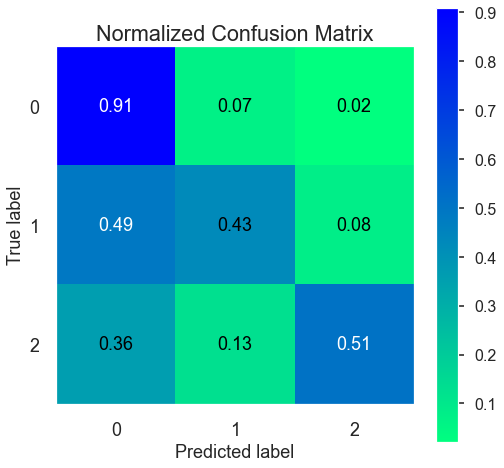

In [32]:
plot_confusion_matrix(y_val, y_pred, normalize=True,figsize=(8,8),cmap='winter_r')
plt.show()

## Decision Tree

A decision tree builds classification or regression models as a tree structure, with datasets broken up into small subsets while developing the decision tree, with branches and nodes. Decision trees can handle both categorical and numerical data. 



In [33]:
from sklearn.tree import DecisionTreeClassifier 
modelstart = time.time()
rf = DecisionTreeClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_val)
dt_f1 = round(f1_score(y_val, y_pred, average='weighted'),2)
print('Accuracy %s' % accuracy_score(y_pred, y_val))
print("Model Runtime: %0.2f seconds"%((time.time() - modelstart)))
report = classification_report(y_val, y_pred, output_dict=True)
pd.DataFrame(report).transpose()

Accuracy 0.712431693989071
Model Runtime: 1.94 seconds


,precision,recall,f1-score,support
0,0.799163,0.832244,0.815368,918.000000
1,0.498361,0.490323,0.494309,310.000000
2,0.625616,0.538136,0.578588,236.000000
accuracy,0.712432,0.712432,0.712432,0.712432
macro avg,0.641047,0.620234,0.629422,1464.000000
weighted avg,0.707492,0.712432,0.709215,1464.000000


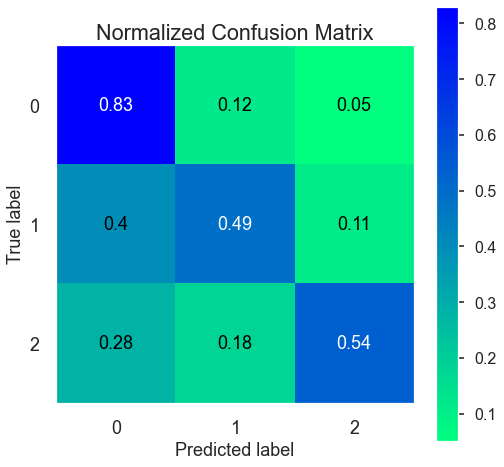

In [34]:
plot_confusion_matrix(y_val, y_pred, normalize=True,figsize=(8,8),cmap='winter_r')
plt.show()

## Gradient Boost 

It is a supervised learning algorithm where strong predictors is build in additive or sequential manner using weak predictor typically Decision tree. It is used for both classification and regression task.

It is ensemble learning algorithm. It is based on strong theoretical concept of sequentially combining weak predictor to build strong predictor

In [35]:
from sklearn.ensemble import GradientBoostingClassifier
modelstart = time.time()
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1)
gb_model.fit(X_train, y_train)
y_pred = gb_model.predict(X_val)
gb_model_f1 = round(f1_score(y_val, y_pred, average='weighted'),2)
print('Accuracy %s' % accuracy_score(y_pred, y_val))
print("Model Runtime: %0.2f seconds"%((time.time() - modelstart)))
report = classification_report(y_val, y_pred, output_dict=True)
pd.DataFrame(report).transpose()

Accuracy 0.73224043715847
Model Runtime: 9.15 seconds


,precision,recall,f1-score,support
0,0.752879,0.925926,0.830484,918.00000
1,0.637037,0.277419,0.386517,310.00000
2,0.680000,0.576271,0.623853,236.00000
accuracy,0.732240,0.732240,0.732240,0.73224
macro avg,0.689972,0.593205,0.613618,1464.00000
weighted avg,0.716601,0.732240,0.703165,1464.00000


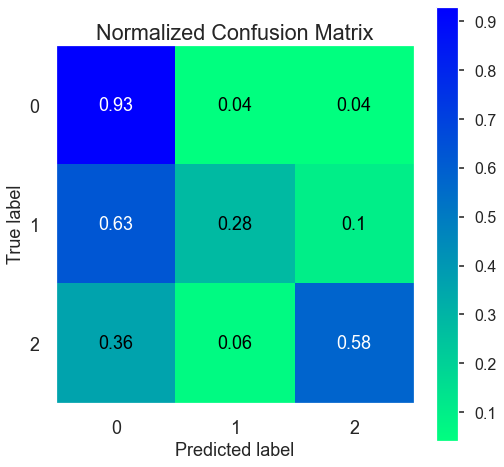

In [36]:
plot_confusion_matrix(y_val, y_pred, normalize=True,figsize=(8,8),cmap='winter_r')
plt.show()

## LinearSVC 

The idea of SVM is simple: The algorithm creates a line or a hyperplane which separates the data into classes.

In [37]:
from sklearn.svm import LinearSVC
modelstart = time.time() 
linsvc = LinearSVC()
linsvc.fit(X_train, y_train)
y_pred = linsvc.predict(X_val)
linsvc_f1 = round(f1_score(y_val, y_pred, average='weighted'),2)
print('Accuracy %s' % accuracy_score(y_pred, y_val))
print("Model Runtime: %0.2f seconds"%((time.time() - modelstart)))
report = classification_report(y_val, y_pred, output_dict=True)
results = pd.DataFrame(report).transpose()

results

Accuracy 0.7745901639344263
Model Runtime: 0.12 seconds


,precision,recall,f1-score,support
0,0.823054,0.886710,0.853697,918.00000
1,0.597902,0.551613,0.573826,310.00000
2,0.788360,0.631356,0.701176,236.00000
accuracy,0.774590,0.774590,0.774590,0.77459
macro avg,0.736438,0.689893,0.709566,1464.00000
weighted avg,0.769785,0.774590,0.769848,1464.00000


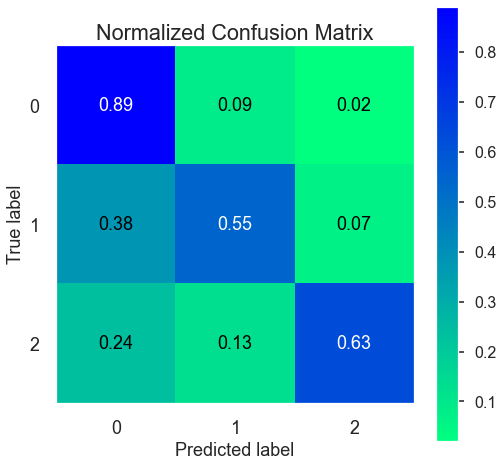

In [38]:
plot_confusion_matrix(y_val, y_pred, normalize=True,figsize=(8,8),cmap='winter_r')
plt.show()

## Performance Evaluation 

F1 - score metric

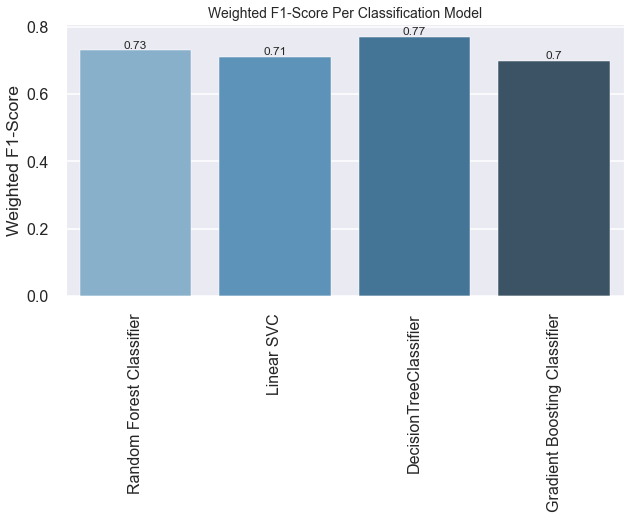

In [39]:
# Compare Weighted F1-Scores Between Models
fig,axis = plt.subplots(figsize=(10, 5))
rmse_x = ['Random Forest Classifier','Linear SVC','DecisionTreeClassifier','Gradient Boosting Classifier']
rmse_y = [rf_f1,dt_f1,linsvc_f1,gb_model_f1]
ax = sns.barplot(x=rmse_x, y=rmse_y,palette=("Blues_d"))
plt.title('Weighted F1-Score Per Classification Model',fontsize=14)
plt.xticks(rotation=90)
plt.ylabel('Weighted F1-Score')
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_y() + p.get_height(), round(p.get_height(),2), fontsize=12, ha="center", va='bottom')
    
plt.show()

## Hyperparameter tuning 

## Random forest 

n_estimators = number of trees in the foreset


max_features = max number of features considered for splitting a node


max_depth = max number of levels in each decision tree


min_samples_split = min number of data points placed in a node before the node is split


min_samples_leaf = min number of data points allowed in a leaf node


bootstrap = method for sampling data points (with or without replacement)

Use the documentation on the random forest i Scikit-Learn. This tells us the most important settings are the number of trees in the forest(n_estimators) and the number of features considered for splitting at each leaf node(max_features). So we going to try a wide range of values and see what works best then try adjusting the set of parameters. 

## RandomizedSearchCV vs GridSearchCV 

RandomizedSearchCV: Only few samples in the data are randomly selected


GridSearchCv: Considers all possible combinations of hyperparameters

## K-fold Cross-validation

In K-fold cross-validation the training dataset is divided into three parts as training data , cross validation data and testing data. This is a way to utilise the training data we have as much as possible.  



In [40]:
from sklearn.ensemble import RandomForestRegressor

# Run RandomizedSearchCV to tune the hyper-parameter
from sklearn.model_selection import RandomizedSearchCV
rfr=RandomForestRegressor()
k_fold_cv = 5 # Stratified 5-fold cross validation
params = {
 'n_estimators' : [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features' : ['auto', 'sqrt'],
 'bootstrap' : [True, False]
 }
random = RandomizedSearchCV(rfr, param_distributions=params, cv=k_fold_cv,
 n_iter = 5, scoring='neg_mean_absolute_error',verbose=2, random_state=42,
 n_jobs=-1, return_train_score=True)
random.fit(X_train, y_train)
# print('Best hyper parameter:’, random.best_params_)
print('Best hyper parameter:', random.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  25 | elapsed:  3.5min remaining:   18.3s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  3.6min finished


Best hyper parameter: {'n_estimators': 30, 'max_features': 'auto', 'bootstrap': False}


## GridSearchCV 

In [41]:
# # Run GridSearch to tune the hyper-parameter
# from sklearn.model_selection import GridSearchCV
# rfr=RandomForestRegressor()
# k_fold_cv = 5 # Stratified 5-fold cross validation
# grid_params = {
#  'n_estimators' : [10, 50,100],
#  'max_features' : ['auto', 'sqrt'],
#  'bootstrap' : [True, False]
#  }
# grid = GridSearchCV(rfr, param_grid = grid_params, cv=k_fold_cv, verbose=0, n_jobs =1, return_train_score=True)

# grid.fit(X_train, y_train)

# print('Best hyper parameter:', grid.best_params_)

Using the RandomizedSearchCV we observed that our model for the random forest classifier improved by 1,05% , where initally our model accuracy was 72% and after applying the new hyperparameters in moved up to 73%. Though from research we know that a RandomizedSearchCV works works extremely well with a large dataset , the concept of hyperparameter tuning was put to the test and yielded a positive outcome.